In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from google.colab import drive

drive.mount('/content/drive/')
%cd /content/drive/MyDrive/MonaLisa/

Mounted at /content/drive/
/content/drive/MyDrive/MonaLisa


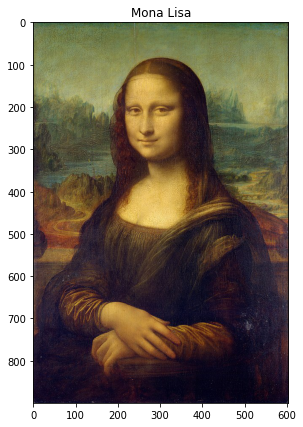

In [2]:
img = plt.imread('monaLisa2.jpg')
plt.figure(figsize=[7,7])
plt.imshow(img);
plt.title("Mona Lisa");

In [3]:
height, width = img.shape[0], img.shape[1]
print(height, width)

900 604


(900, 604, 3)


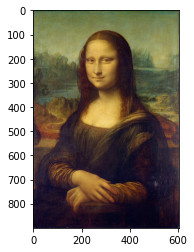

In [4]:
img_array = np.asarray(img)
img_array = np.reshape(img_array, (height, width, 3)) / 255
plt.imshow(img_array)
print(img_array.shape)


##b. Preprocessing the Input
Randomly picking 5000 x,y coordinates sampled from the Mona Lisa image.

In [5]:
y_5000 = np.random.choice(height, size=5000, replace=True)
x_5000 = np.random.choice(width, size=5000, replace=True)

In [6]:
coordinates = list(zip(x_5000, y_5000))
print(len(coordinates))

5000


##c. Preprocessing the Output

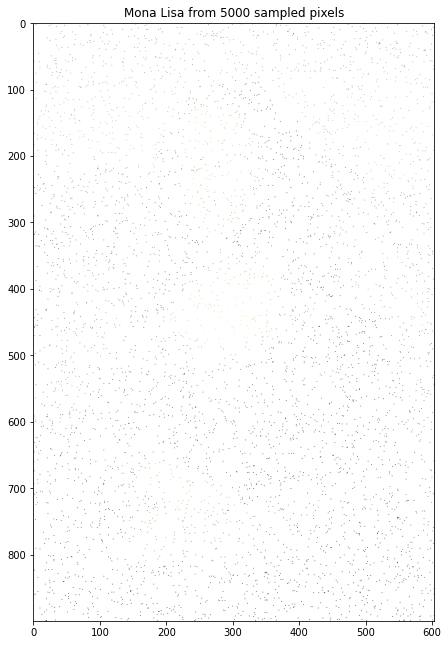

In [7]:
img_5000px = np.zeros([height, width, 3]) + 255
pixels = []
for x, y in coordinates:
  pixels.append(img[y,x])
  img_5000px[y,x] = img[y,x]

# Dividing by 255 to rescaling the pixel intensities
img_5000px = img_5000px / 255

plt.figure(figsize=[11,11])
plt.imshow(img_5000px);
plt.title("Mona Lisa from 5000 sampled pixels");

##d. Build the Random Forest

In [8]:
trainset = np.array([y_5000, x_5000]).T


In [9]:
def build_random_forest(n_estimators=10, max_depth=None, min_samples_split=2, min_samples_leaf=1):
    rf = RandomForestRegressor(n_estimators=n_estimators, 
                               max_depth=max_depth,
                               min_samples_split=min_samples_split,
                               min_samples_leaf=min_samples_leaf)
    rf.fit(trainset, pixels)
    
    prediction = np.zeros([height, width, 3])
    for i in range(height):
        for j in range(width):
            prediction[i,j] = rf.predict(np.array([i,j]).reshape(1,-1))
    return prediction / 255

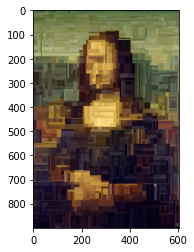

In [11]:
img_rf = build_random_forest(1)
plt.imshow(img_rf)
plt.show()

In [11]:
def experiment_depths(depths):
  for max_depth in depths:
    rf_image = build_random_forest(n_estimators=1, max_depth=max_depth)
    plt.imshow(rf_image)
    title = " Depth=" + str(max_depth)
    plt.title(title);
    plt.show()

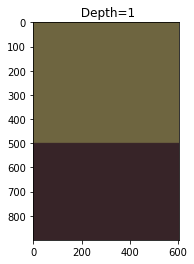

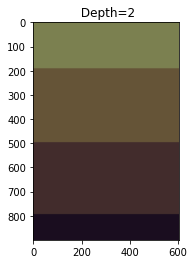

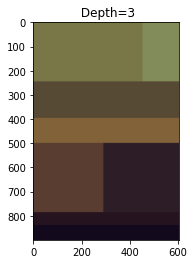

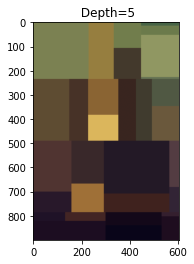

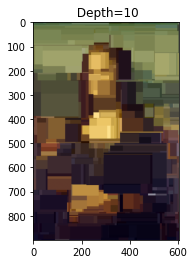

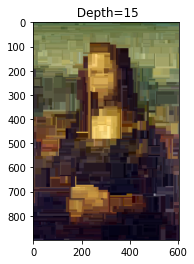

In [12]:
depths = [1,2,3,5,10,15]

experiment_depths(depths)


In [13]:
def experiment_numTrees(numTrees):
  for num in numTrees:
    rf_image = build_random_forest(n_estimators=num, max_depth=7)
    plt.imshow(rf_image)
    title = " Number of Trees =" + str(num)
    plt.title(title);
    plt.show()

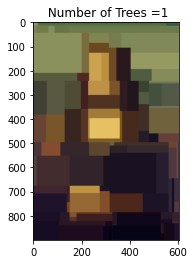

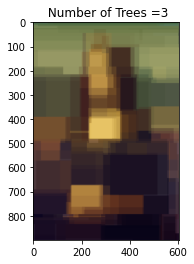

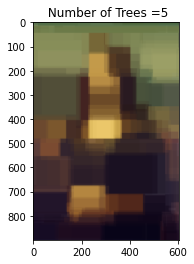

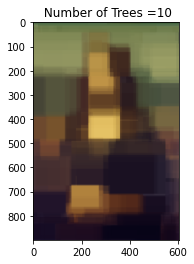

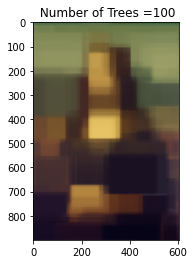

In [14]:
numTrees = [1,3,5,10,100]

experiment_numTrees(numTrees)

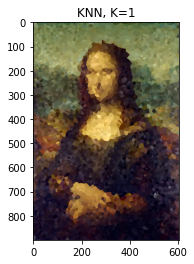

In [15]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(trainset, pixels)

prediction = np.zeros([height, width, 3])
for i in range(height):
    for j in range(width):
        prediction[i,j] = knn.predict(np.array([i,j]).reshape(1,-1))

plt.imshow(prediction / 255)
plt.title('KNN, K=1');
plt.show()

In [12]:
def experiment_splits(splits):
  for split in splits:
    rf_image = build_random_forest(n_estimators=1, min_samples_split=split)
    plt.imshow(rf_image)
    title = " Split=" + str(split)
    plt.title(title);
    plt.show()

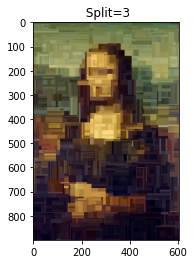

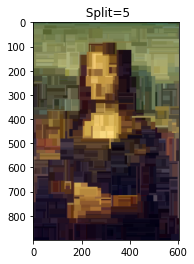

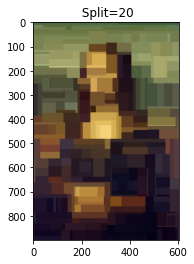

In [14]:
splits = [3,5,20]

experiment_splits(splits)